### Cameron Harris Project 2

In [74]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt
import math
%matplotlib inline

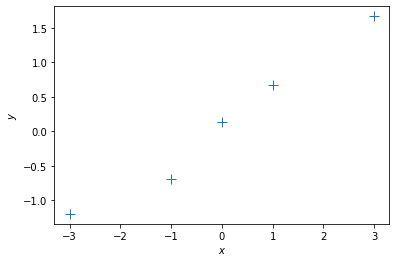

In [75]:
X = np.array([-3, -1, 0, 1, 3]).reshape(-1,1)
y = np.array([-1.2, -0.7, 0.14, 0.67, 1.67]).reshape(-1,1)

plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$y$");

In [76]:
def max_lik_estimate(X, y):
    
    # X: N x D matrix of training inputs
    # y: N x 1 vector of training targets/observations
    # returns: maximum likelihood parameters (D x 1)
    N, D = X.shape
    theta_ml = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta_ml

In [77]:
theta_ml = max_lik_estimate(X, y)
theta_ml

array([[0.499]])

In [78]:
def predict_with_estimate(Xtest, theta):
    
    # Xtest: K x D matrix of test inputs
    # theta: D x 1 vector of parameters
    # returns: prediction of f(Xtest); K x 1 vector
    prediction = Xtest @ theta
    
    return prediction 

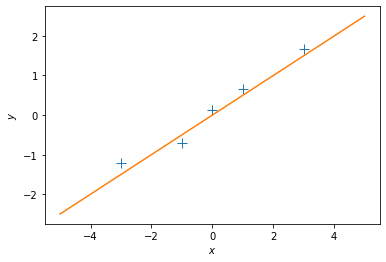

In [79]:
Xtest = np.linspace(-5,5,100).reshape(-1,1)
ml_prediction = predict_with_estimate(Xtest, theta_ml)

plt.figure()
plt.plot(X, y, '+', markersize=10)
plt.plot(Xtest, ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$");

**Questions**

1. Yes, the solution above looks reasonable.
2. If we manually change the value of theta it will rotate the line about the origin.
3. If we modify about training targets and retrain the model it becomes less accurate because there is no intercept term so it cannot adjust to a linear trend that does not start at the origin.

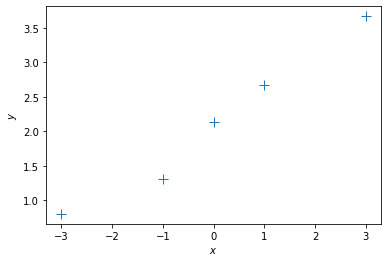

In [80]:
ynew = y + 2.0

plt.figure()
plt.plot(X, ynew, '+', markersize=10)
plt.xlabel("$x$")
plt.ylabel("$y$");

[[0.499]]


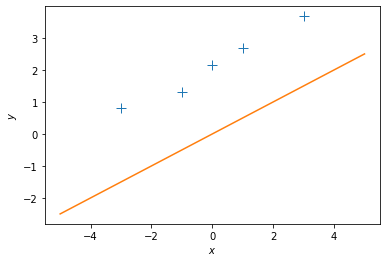

In [81]:
theta_ml = max_lik_estimate(X, ynew)

Xtest = np.linspace(-5,5,100).reshape(-1,1)

ml_prediction = predict_with_estimate(Xtest, theta_ml)

plt.figure()
plt.plot(X, ynew, '+', markersize=10)
plt.plot(Xtest, ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$");

**Questions**

1. This is because the regression algorithm does account for an intercept term so it will always go through the origin.
2. We can fix this by adding a column of 1s to our matrix X.

The effect of the bias parameter is that it allows the regression to find an optimal intercept for a given fitted line.

In [82]:
N, D = X.shape
X_aug = np.hstack([np.ones((N,1)), X])
theta_aug = np.zeros((D+1, 1))

In [83]:
def max_lik_estimate_aug(X_aug, y):
    theta_aug_ml = np.linalg.inv(X_aug.T @ X_aug) @ X_aug.T @ y## <-- EDIT THIS LINE
    
    return theta_aug_ml

In [86]:
theta_aug_ml = max_lik_estimate_aug(X_aug, ynew)

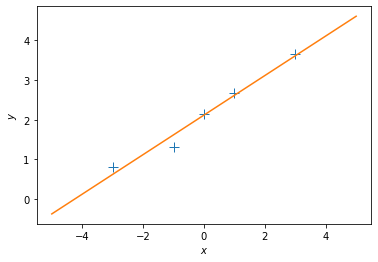

In [87]:
Xtest_aug = np.hstack([np.ones((Xtest.shape[0],1)), Xtest])

ml_prediction = predict_with_estimate(Xtest_aug, theta_aug_ml)

# plot
plt.figure()
plt.plot(X, ynew, '+', markersize=10)
plt.plot(Xtest, ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$");

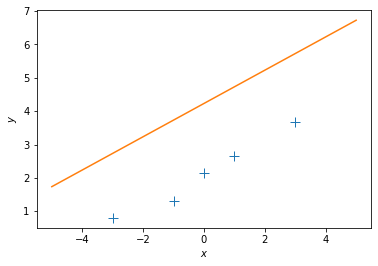

In [88]:
Xtest_aug = np.hstack([2*np.ones((Xtest.shape[0],1)), Xtest])
ml_prediction = predict_with_estimate(Xtest_aug, theta_aug_ml)

plt.figure()
plt.plot(X, ynew, '+', markersize=10)
plt.plot(Xtest, ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$");

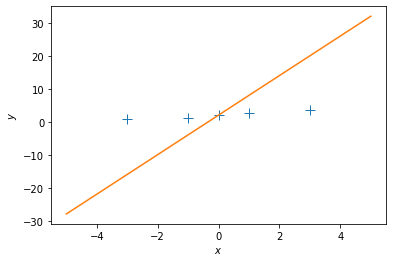

In [90]:
Xtest_aug = np.hstack([np.ones((Xtest.shape[0],1)), Xtest])
theta_aug_ml[1] = 6

ml_prediction = predict_with_estimate(Xtest_aug, theta_aug_ml)


plt.figure()
plt.plot(X, ynew, '+', markersize=10)
plt.plot(Xtest, ml_prediction)
plt.xlabel("$x$")
plt.ylabel("$y$");

**Questions**

1. Changing the column of 1s to be a column of 2s or 3s has basically the same effect as increasing the y values without having an intercept term. Our regression line is shifted either up or down by this transformation.
2. If we manually change the estimate of theta_1 we rotate our regression line. Since it's no longer the estimated parameter it makes the model inaccurate.

**Non Linear Features**

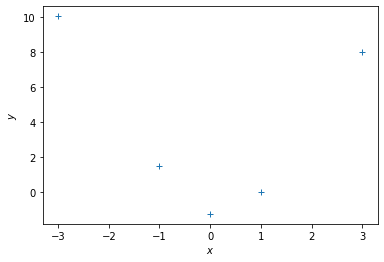

In [91]:
y = np.array([10.05, 1.5, -1.234, 0.02, 8.03]).reshape(-1,1)
plt.figure()
plt.plot(X, y, '+')
plt.xlabel("$x$")
plt.ylabel("$y$");

In [92]:
def poly_features(X, K):
    
    # X: inputs of size N x 1
    # K: degree of the polynomial
    # computes the feature matrix Phi (N x (K+1))
    
    X = X.flatten()
    N = X.shape[0]
    
    #initialize Phi
    Phi = np.zeros((N, K+1))
    
    # Compute the feature matrix in stages

    Phi = [X**k for k in range(K+1)]
    Phi = np.matrix(Phi).T
    return Phi

In [111]:
## EDIT THIS FUNCTION
def nonlinear_features_maximum_likelihood(Phi, y):
    # Phi: features matrix for training inputs. Size of N x D
    # y: training targets. Size of N by 1
    # returns: maximum likelihood estimator theta_ml. Size of D x 1
    kappa = 1e-06
    
    D = (Phi.T @ Phi).shape[0]  
    
    theta_ml = scipy.linalg.inv((Phi.T @ Phi) + (kappa*np.eye(D))) @ Phi.T @ y
  
    
    return theta_ml

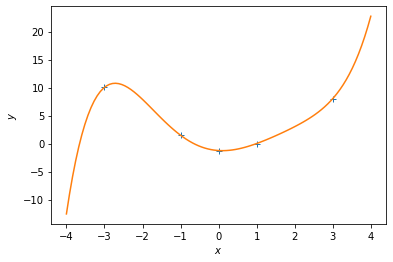

In [112]:
K = 5
Phi = poly_features(X, K)
theta_ml = nonlinear_features_maximum_likelihood(Phi, y)

Xtest = np.linspace(-4,4,100).reshape(-1,1)
Phi_test = poly_features(Xtest, K)

y_pred = Phi_test @ theta_ml

plt.figure()
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred)
plt.xlabel("$x$")
plt.ylabel("$y$");

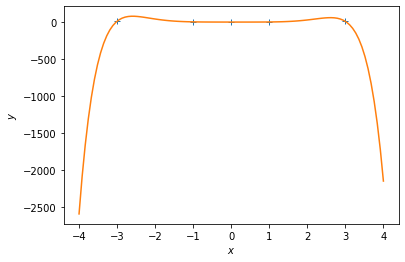

In [117]:
K = 8
Phi = poly_features(X, K)
theta_ml = nonlinear_features_maximum_likelihood(Phi, y)

Xtest = np.linspace(-4,4,100).reshape(-1,1)
Phi_test = poly_features(Xtest, K)

y_pred = Phi_test @ theta_ml

plt.figure()
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred)
plt.xlabel("$x$")
plt.ylabel("$y$");

**Questions**

1. We notice as we increase K the model becomes increasingly overfit to the data.
2. A good fit will have low error, not be overfit, and will generalize well to unseen data.

**Evaluating the Quality of the Model**

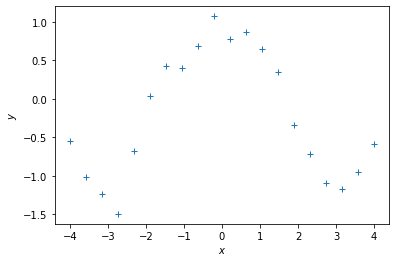

In [118]:
def f(x):   
    return np.cos(x) + 0.2*np.random.normal(size=(x.shape))

X = np.linspace(-4,4,20).reshape(-1,1)
y = f(X)

plt.figure()
plt.plot(X, y, '+')
plt.xlabel("$x$")
plt.ylabel("$y$");

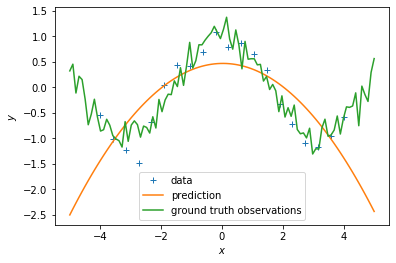

In [120]:
K = 2

Phi = poly_features(X, K)

theta_ml = nonlinear_features_maximum_likelihood(Phi, y)

Xtest = np.linspace(-5,5,100).reshape(-1,1)
ytest = f(Xtest)

Phi_test = poly_features(Xtest, K)

y_pred = Phi_test @ theta_ml 

plt.figure()
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred)
plt.plot(Xtest, ytest)
plt.legend(["data", "prediction", "ground truth observations"])
plt.xlabel("$x$")
plt.ylabel("$y$");

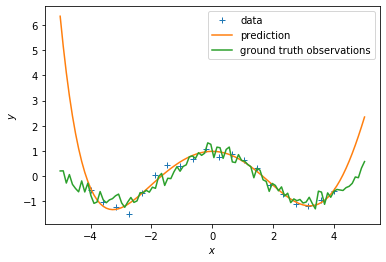

In [127]:
K = 7
Phi = poly_features(X, K)
theta_ml = nonlinear_features_maximum_likelihood(Phi, y)
Xtest = np.linspace(-5,5,100).reshape(-1,1)
ytest = f(Xtest)
Phi_test = poly_features(Xtest, K)
y_pred = Phi_test @ theta_ml
# plot
plt.figure()
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred)
plt.plot(Xtest, ytest)
plt.legend(["data", "prediction", "ground truth observations"])
plt.xlabel("$x$")
plt.ylabel("$y$");

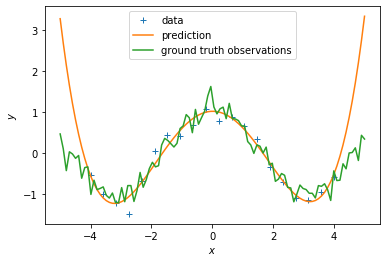

In [126]:
K = 4
Phi = poly_features(X, K)
theta_ml = nonlinear_features_maximum_likelihood(Phi, y)
Xtest = np.linspace(-5,5,100).reshape(-1,1)
ytest = f(Xtest)
Phi_test = poly_features(Xtest, K)
y_pred = Phi_test @ theta_ml 
# plot
plt.figure()
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred)
plt.plot(Xtest, ytest)
plt.legend(["data", "prediction", "ground truth observations"])
plt.xlabel("$x$")
plt.ylabel("$y$");

**Questions**

2. Based on visual inspection it looks like k=4 will give us the best fit. Higher polynomials like k=7 will increase the fit but it becomes more likely the model is overfit with high k.

In [131]:
def RMSE(y, ypred):
    n = len(y)
    rmse = np.sqrt((1/n)*np.sum(np.power(y-ypred,2)))
    return rmse

Text(0, 0.5, 'RMSE')

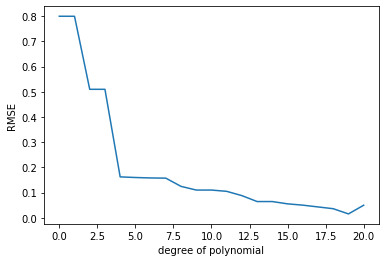

In [133]:
K_max = 20
rmse_train = np.zeros((K_max+1,))

for k in range(K_max+1):
    Phi = poly_features(X, k)
    
    theta_ml = nonlinear_features_maximum_likelihood(Phi, y)
    
    ypred_train = Phi @ theta_ml
    
    rmse_train[k] = RMSE(y, ypred_train)
    

plt.figure()
plt.plot(rmse_train)
plt.xlabel("degree of polynomial")
plt.ylabel("RMSE")

**Questions**

1. We observe that increasing the polynomial degree almost always decreases our error.
2. If we are only looking at this RMSE plot, a polynomial of degree 19 will have the least error.

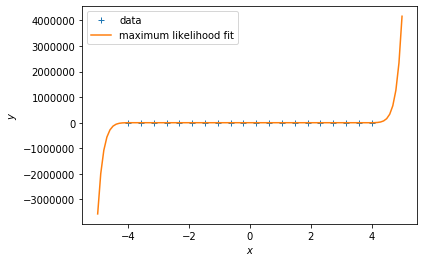

In [134]:
# WRITE THE PLOTTING CODE HERE
plt.figure()
plt.plot(X, y, '+')

# feature matrix
Phi = poly_features(X, 19)

theta_ml = nonlinear_features_maximum_likelihood(Phi, y)   

Phi_test = poly_features(Xtest, 19)

ypred_test = Phi_test @ theta_ml

plt.plot(Xtest, ypred_test) 
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(["data", "maximum likelihood fit"]);

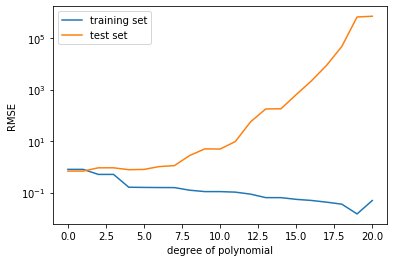

In [135]:
K_max = 20
rmse_train = np.zeros((K_max+1,))
rmse_test = np.zeros((K_max+1,))

for k in range(K_max+1):
    
    Phi = poly_features(X, k)
    
    theta_ml = nonlinear_features_maximum_likelihood(Phi, y)
    
    ypred_train = Phi @ theta_ml
    
    rmse_train[k] = RMSE(y, ypred_train)    
    
    Phi_test = poly_features(Xtest, k)
    
    ypred_test = Phi_test @ theta_ml
    
    rmse_test[k] = RMSE(ytest, ypred_test)
    

plt.figure()
plt.semilogy(rmse_train) 
plt.semilogy(rmse_test) 
plt.xlabel("degree of polynomial")
plt.ylabel("RMSE")
plt.legend(["training set", "test set"]);

**Questions**

1. We observe that as the polynomial degree increases the error in the training set goes down while the error of the test set always increases.
2. It doesn't always go down because the model was not trained on this data; it's new information to the model.
3. We would choose a polynomial degree of 4.

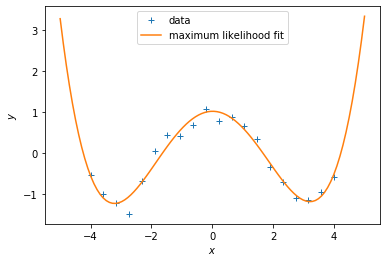

In [137]:
plt.figure()
plt.plot(X, y, '+')


Phi = poly_features(X, 4)


theta_ml = nonlinear_features_maximum_likelihood(Phi, y)   


Phi_test = poly_features(Xtest, 4)

ypred_test = Phi_test @ theta_ml

plt.plot(Xtest, ypred_test) 
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(["data", "maximum likelihood fit"]);

**Question**

We could estimate generalization error by breaking the training set into different subsets. We could find subsets based on their mean or variance to estimate how well the model can generalize to a subset with a different mean/variance.

**Maximum A Posteriori Estimation**

In [138]:
def map_estimate_poly(Phi, y, sigma, alpha):
    # Phi: training inputs, Size of N x D
    # y: training targets, Size of D x 1
    # sigma: standard deviation of the noise 
    # alpha: standard deviation of the prior on the parameters
    # returns: MAP estimate theta_map, Size of D x 1
    
    D = Phi.shape[1] 
    n = (Phi.T @ Phi).shape[0]
    theta_map = np.linalg.inv((Phi.T @ Phi) + (np.identity(n)*(sigma / alpha)**2)) @ Phi.T @ y
    
    return theta_map

In [139]:
def g(x, sigma):
    p = np.hstack([x**0, x**1, np.sin(x)])
    w = np.array([-1.0, 0.1, 1.0]).reshape(-1,1)
    return p @ w + sigma*np.random.normal(size=x.shape) 

(20, 1)


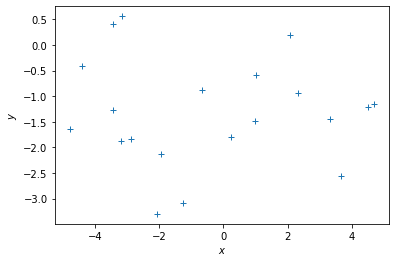

In [140]:
sigma = 1.0 
alpha = 1.0 
N = 20

np.random.seed(42)

X = (np.random.rand(N)*10.0 - 5.0).reshape(-1,1)
y = g(X, sigma) 
print(y.shape)

plt.figure()
plt.plot(X, y, '+')
plt.xlabel("$x$")
plt.ylabel("$y$");

(20, 9)
(20, 1)


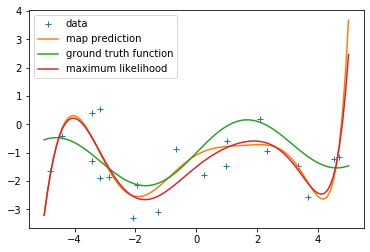

In [147]:
K = 8   

Phi = poly_features(X, K)
print(Phi.shape)
print(y.shape)
theta_map = map_estimate_poly(Phi, y, sigma, alpha)

theta_ml = nonlinear_features_maximum_likelihood(Phi, y)

Xtest = np.linspace(-5,5,100).reshape(-1,1)
ytest = g(Xtest, sigma)

Phi_test = poly_features(Xtest, K)
y_pred_map = Phi_test @ theta_map

y_pred_mle = Phi_test @ theta_ml

plt.figure()
plt.plot(X, y, '+')
plt.plot(Xtest, y_pred_map)
plt.plot(Xtest, g(Xtest, 0))
plt.plot(Xtest, y_pred_mle)

plt.legend(["data", "map prediction", "ground truth function", "maximum likelihood"]);

In [142]:
print(np.hstack([theta_ml, theta_map]))

[[-1.49712923e+00 -1.08154986e+00]
 [ 8.56868534e-01  6.09177023e-01]
 [-1.28336152e-01 -3.62071208e-01]
 [-7.75318361e-02 -3.70531732e-03]
 [ 3.56426192e-02  7.43090617e-02]
 [-4.11627725e-03 -1.03278646e-02]
 [-2.48818242e-03 -4.89363010e-03]
 [ 2.70146933e-04  4.24148554e-04]
 [ 5.35997005e-05  1.03384719e-04]]


In [24]:
def RMSE(y, ypred):
    n = len(y)
    rmse = np.sqrt((1/n)*np.sum(np.power(y-ypred,2)))
    return rmse

1.2996858375556803
1.309933559800785
1.3120784275120334
1.2126410989017273
1.1926710383888055
1.2312481428442283
1.2230212914309415
1.2886780892960261
1.3327968150963774
1.1969806203620859
1.227634943015616
1.2360081578237814
1.588780590728175


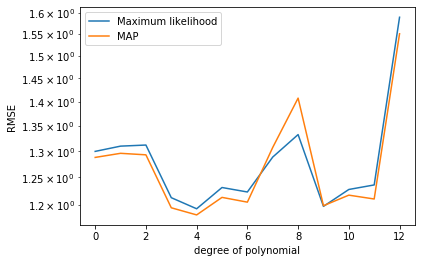

In [149]:
K_max = 12 
assert(K_max < N) 

rmse_mle = np.zeros((K_max+1,))
rmse_map = np.zeros((K_max+1,))
for k in range(K_max+1):
    # mle
    Phi = poly_features(X, k)
    theta_mle = nonlinear_features_maximum_likelihood(Phi, y)
    Phi_test = poly_features(Xtest, k)
    ypred_mle = Phi_test @ theta_mle
    rmse_mle[k] = RMSE(ytest, ypred_mle)
    # map
    theta_map = map_estimate_poly(Phi, y, sigma, alpha)
    Phi_test = poly_features(Xtest, k)
    ypred_map = Phi_test @ theta_map
    rmse_map[k] = RMSE(ytest, ypred_map) 
    print(rmse_mle[k])

plt.figure()
plt.semilogy(rmse_mle) 
plt.semilogy(rmse_map) 
plt.xlabel("degree of polynomial")
plt.ylabel("RMSE")
plt.legend(["Maximum likelihood", "MAP"])

1.2996858375556803
1.309933559800785
1.3120784275120334
1.2126410989017273
1.1926710383888055
1.2312481428442283
1.2230212914309415
1.2886780892960261
1.3327968150963774
1.1969806203620859
1.227634943015616
1.2360081578237814
1.588780590728175


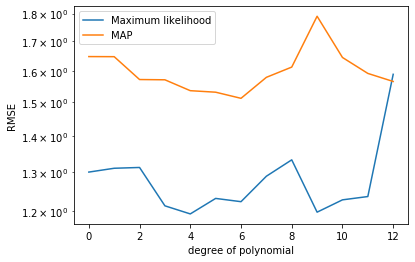

In [151]:
alpha = 0.01
K_max = 12 
assert(K_max < N) 

rmse_mle = np.zeros((K_max+1,))
rmse_map = np.zeros((K_max+1,))
for k in range(K_max+1):
    # mle
    Phi = poly_features(X, k)
    theta_mle = nonlinear_features_maximum_likelihood(Phi, y)
    Phi_test = poly_features(Xtest, k)
    ypred_mle = Phi_test @ theta_mle
    rmse_mle[k] = RMSE(ytest, ypred_mle)
    # map
    theta_map = map_estimate_poly(Phi, y, sigma, alpha)
    Phi_test = poly_features(Xtest, k)
    ypred_map = Phi_test @ theta_map
    rmse_map[k] = RMSE(ytest, ypred_map) 
    print(rmse_mle[k])

plt.figure()
plt.semilogy(rmse_mle)
plt.semilogy(rmse_map)
plt.xlabel("degree of polynomial")
plt.ylabel("RMSE")
plt.legend(["Maximum likelihood", "MAP"])

**Questions**

1. We observe that there are diminishing returns to increasing the polynomial degree. From 3-5 we've decreased our error, probably without overfitting. After this error starts to spike and it becomes more likely the model is overfit.
2. As alpha increases while holding sigma constant the MAP estimate converges to the MLE estimate. If sigma is large and alpha is small, MAP prevents our model from overfitting as it basically adds a penalty to our model for having a lot of noise variance and not very much prior variance. MAP can be used to reduce our generalization error.

**Bayesian Linear Regression**

In [201]:
Ntest = 200
Xtest = np.linspace(-5, 5, Ntest).reshape(-1,1) # test inputs

prior_var = 2.0 
noise_var = 1.0 

pol_deg = 3

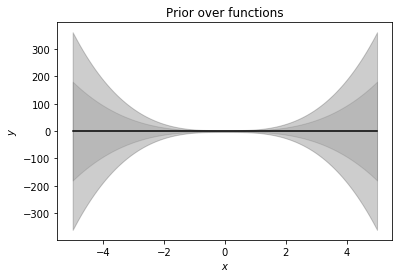

In [203]:
Phi_test = poly_features(Xtest, pol_deg)

prior_mean = np.zeros((Ntest, 1))


# prior variance
full_covariance = Phi_test @ Phi_test.T * prior_var
prior_marginal_var = np.diag(full_covariance)

plt.figure()
plt.plot(Xtest, prior_mean, color="k")

conf_bound1 = np.sqrt(prior_marginal_var).flatten()
conf_bound2 = 2.0*np.sqrt(prior_marginal_var).flatten()
conf_bound3 = 2.0*np.sqrt(prior_marginal_var + noise_var).flatten()
plt.fill_between(Xtest.flatten(), 
                 prior_mean.flatten() + conf_bound1, 
                 prior_mean.flatten() - conf_bound1, alpha = 0.1, color="k")
plt.fill_between(Xtest.flatten(), prior_mean.flatten() + conf_bound2, 
                 prior_mean.flatten() - conf_bound2, alpha = 0.1, color="k")
plt.fill_between(Xtest.flatten(), prior_mean.flatten() + conf_bound3, 
                 prior_mean.flatten() - conf_bound3, alpha = 0.1, color="k")

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title("Prior over functions");

Every sampled function is a polynomial of degree 3


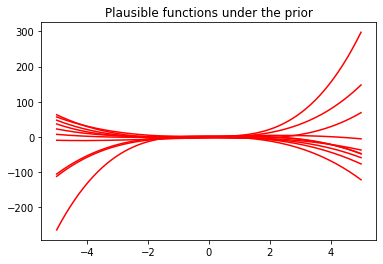

In [204]:
num_samples = 10

random_weights = np.random.normal(size=(pol_deg+1,num_samples), scale=np.sqrt(prior_var))

sample_function = Phi_test @ random_weights


plt.figure()
plt.plot(Xtest, sample_function, color="r")
plt.title("Plausible functions under the prior")
print("Every sampled function is a polynomial of degree "+str(pol_deg));

In [205]:
N = 10
X = np.random.uniform(high=5, low=-5, size=(N,1))
y = g(X, np.sqrt(noise_var))

In [206]:
## EDIT THIS FUNCTION

def polyfit(X, y, K, prior_var, noise_var):
    # X: training inputs, size N x D
    # y: training targets, size N x 1
    # K: degree of polynomial we consider
    # prior_var: prior variance of the parameter distribution
    # sigma: noise variance
    
    jitter = 1e-08
    
    Phi = poly_features(X, K) 
    
    Pt = Phi.T @ y
    PP = Phi.T @ Phi + jitter*np.eye(K+1)
    C = scipy.linalg.cho_factor(PP)
    theta_ml = scipy.linalg.cho_solve(C, Pt)
    

    theta_map = scipy.linalg.solve(PP + noise_var/prior_var*np.eye(K+1), Pt)
    
    
    iSN = (np.eye(K+1)/prior_var + PP/noise_var)
    SN = scipy.linalg.pinv(noise_var*np.eye(K+1)/prior_var + PP)*noise_var
    mN = scipy.linalg.solve(iSN, Pt/noise_var)
    
    
    return (theta_ml, theta_map, mN, SN)

In [207]:
alpha=1.0
theta_ml, theta_map, theta_mean, theta_var = polyfit(X, y, pol_deg, alpha, sigma)

In [208]:
Phi_test = poly_features(Xtest, pol_deg)

m_mle_test = Phi_test @ theta_ml


m_map_test = Phi_test @ theta_map


mean_blr = Phi_test @ theta_mean
print(mean_blr.shape)
# variance prediction
cov_blr =  Phi_test @ theta_var @ Phi_test.T
print(cov_blr.shape)

(200, 4)
(200, 1)
(200, 200)


In [209]:
print(theta_mean)

[[-0.67687259]
 [ 1.27736681]
 [ 0.03910163]
 [-0.07738115]]


In [210]:
mean_blr = np.array(mean_blr.T)[0]

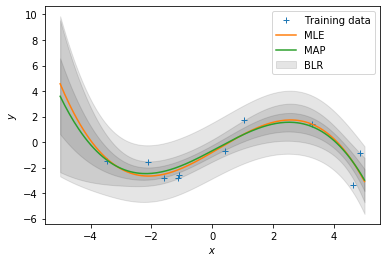

In [211]:
plt.figure()
plt.plot(X, y, "+")
plt.plot(Xtest, m_mle_test)
plt.plot(Xtest, m_map_test)
var_blr = np.diag(cov_blr)
mean_blr = np.ndarray.flatten(mean_blr)
conf_bound1 = np.sqrt(var_blr).flatten()
conf_bound2 = 2.0*np.sqrt(var_blr).flatten()
conf_bound3 = 2.0*np.sqrt(var_blr + sigma).flatten()
plt.fill_between(Xtest.flatten(), mean_blr + conf_bound1, 
                mean_blr - conf_bound1, alpha = 0.1, color="k")
plt.fill_between(Xtest.flatten(), mean_blr + conf_bound2, 
                 mean_blr - conf_bound2, alpha = 0.1, color="k")
plt.fill_between(Xtest.flatten(), mean_blr + conf_bound3, 
                 mean_blr - conf_bound3, alpha = 0.1, color="k")
plt.legend(["Training data", "MLE", "MAP", "BLR"])
plt.xlabel('$x$');
plt.ylabel('$y$');